Task --> Credit Card Fraud Detection using Machine Learning( LogisticRegression)

# 1. Imports

In [1]:

import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# load data

In [2]:
c_card=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [3]:
c_card.head(10) 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
c_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

 # preprocessing

In [5]:
c_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
print("unique value in class festure",c_card['Class'].unique())
c_card['Class'].value_counts()



unique value in class festure [0 1]


Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
fraud=c_card[c_card.Class==1]
Notfraud=c_card[c_card.Class==0]
print(fraud.shape)
print(Notfraud.shape)

(492, 31)
(284315, 31)


In [8]:
print("fraud")
print(fraud['Amount'].describe())
print()
print("not fraud")
print(Notfraud['Amount'].describe())

fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

not fraud
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


# make data balanced

In [9]:
Notfraud=Notfraud.sample(492)
new_c_card=pd.concat([Notfraud,fraud],axis=0)
new_c_card.shape 

(984, 31)

In [10]:
new_c_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
106133,69838.0,0.974179,0.034344,1.202245,2.527949,-0.305238,1.288809,-0.686454,0.556384,-0.154031,...,0.177168,0.651540,-0.050909,-0.285125,0.323798,0.192470,0.051310,0.012317,19.95,0
184349,126208.0,-1.340209,-0.165102,0.048492,-0.104671,3.193802,-1.647391,1.519045,-0.910711,-0.826699,...,0.258617,0.970344,-0.713730,0.699781,1.595550,0.289526,-0.613126,-0.140900,0.00,0
244302,152292.0,1.782514,-0.466211,-2.156858,0.215513,0.464962,-0.241947,0.149579,-0.069111,0.862636,...,-0.180760,-0.597916,-0.070761,-1.272899,-0.022584,-0.049131,-0.036063,-0.019818,145.96,0
31316,36315.0,1.368628,-0.207986,0.226105,-0.531186,-0.835329,-1.150522,-0.396392,-0.269933,-0.984243,...,-0.125743,-0.448444,0.090323,0.319228,0.268330,-0.485147,0.026831,0.048904,25.00,0
17049,28398.0,-2.215840,2.281421,-3.729340,0.970332,1.039645,-0.657314,1.306200,-0.221236,2.403819,...,-0.882068,-0.590533,-0.303631,-1.734844,-0.087724,-0.433492,-0.368058,-0.826935,89.99,0


In [11]:
new_c_card.tail()                                                                                                                                        

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [12]:
new_c_card['Class'].unique()

array([0, 1])

# make correklation matt

Text(0.5, 1.0, 'Correlation Matrix for Credit Card Fraud Detection')

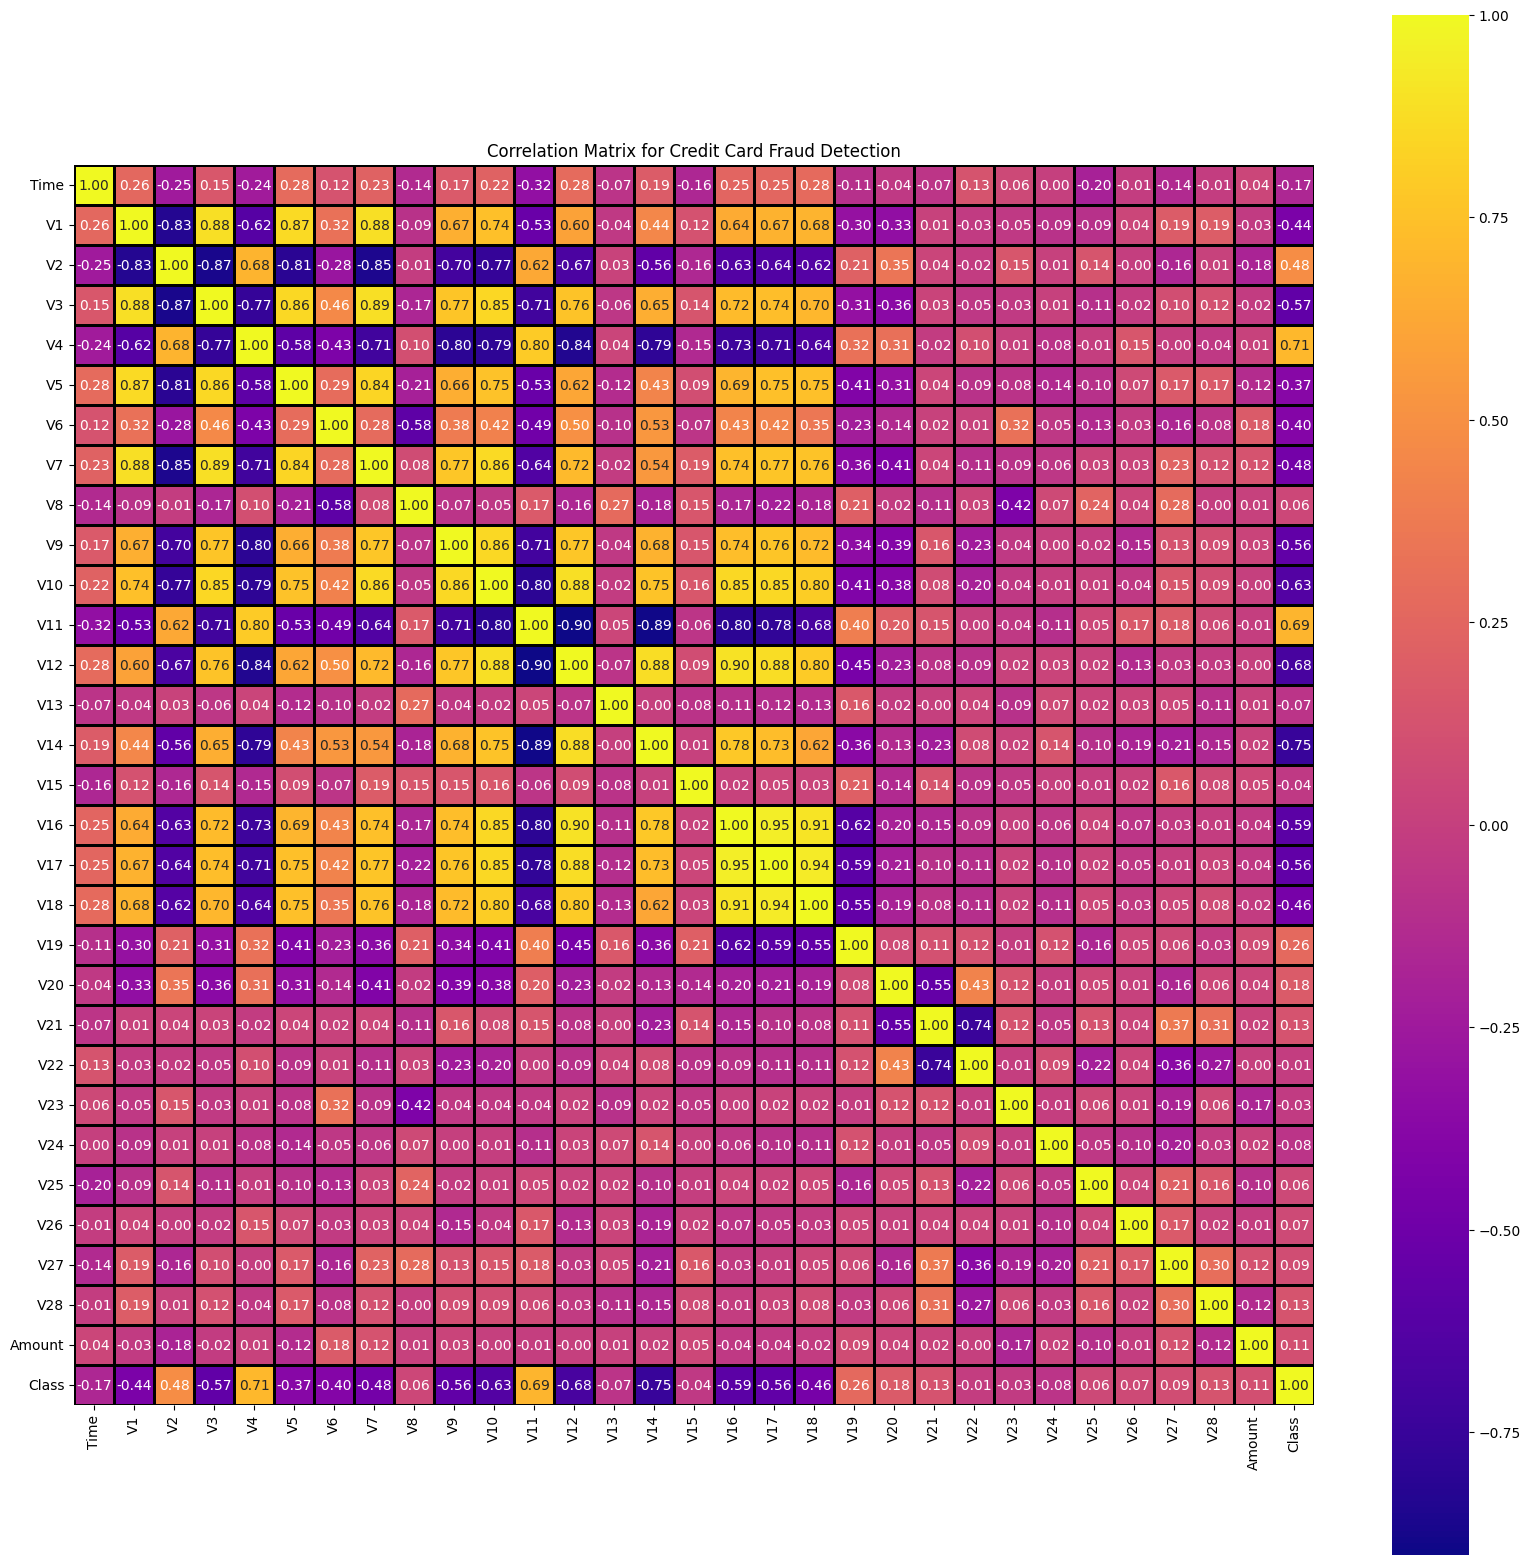

In [13]:
corr_mat=new_c_card.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,annot=True,fmt="0.2f",square=True,cmap="plasma",linewidths=0.8,linecolor="Black")
plt.title("Correlation Matrix for Credit Card Fraud Detection")

In [14]:
h_feature=corr_mat.index[abs(corr_mat['Class'])>=0.1].tolist()
h_feature.remove('Class')
h_feature

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V28',
 'Amount']

# build model

In [15]:
x=new_c_card[h_feature]
y=new_c_card['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [16]:
logistic=LogisticRegression(max_iter=10000)
logistic.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

# evalu model

In [17]:
y_pred=logistic.predict(x_test)
acc=accuracy_score(y_test,y_pred)

In [18]:
print(f"accuracy score = {acc}")

accuracy score = 0.9593908629441624
